# Parts of Speech Tagging

- Implemented using **Hidden Markov Model** with **Laplace Smoothing**.

In [1]:
''' Upload the file hidden_markov_layer to make use of the model '''
from google.colab import files
files.upload()

Saving hidden_markov_model.py to hidden_markov_model (3).py


{'hidden_markov_model (3).py': b"''' Hidden Markov Model '''\r\n\r\nclass HMM:\r\n\r\n    def __init__(self,tagset):\r\n        self.tagset = tagset\r\n        self.k = 1e-4\r\n\r\n    def train(self,sents):\r\n        self.emit,self.trans = {},{}\r\n        self.freq = {}\r\n        for sent in sents:\r\n            prev_tag = '^'\r\n            for ind,word in enumerate(sent):\r\n                word_tag = (word[0].lower(),word[1])\r\n                bigram = (prev_tag,word[1])\r\n                self.emit[word_tag] = self.emit.get(word_tag, 0) + 1\r\n                self.freq[word[1]] = self.freq.get(word[1], 0) + 1\r\n                if ind != 0:\r\n                    self.trans[bigram] = self.trans.get(bigram, 0) + 1\r\n                    prev_tag = word[1]\r\n        for tag in self.tagset:\r\n            self.freq[tag] = self.freq.get(tag, 0)\r\n\r\n    def laplace_trans(self,bigram):\r\n        return (self.trans.get(bigram, 0)+self.k)/(self.freq[bigram[0]]+len(self.tagset)*s

## Collecting the Data

- **Brown Corpus** dataset from **nltk** is used for implementation.

- This dataset consists of different sentences along with their **pos_tags**.

In [2]:
import nltk

CORPUS_NAME = 'brown'
nltk.download(CORPUS_NAME)

TAG_SET = 'universal_tagset'
nltk.download(TAG_SET)

CORPUS = nltk.corpus.brown

UNIVERSAL_TAGS = ["VERB","NOUN","PRON","ADJ","ADV","ADP","CONJ","DET","NUM","PRT","X","."]

sents = CORPUS.tagged_sents(tagset='universal')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [3]:
print("Total Number of different sentences present in the dataset are ",len(sents))

Total Number of different sentences present in the dataset are  57340


In [4]:
# Example of a sentence in the dataset
sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [5]:
from hidden_markov_model import HMM

## Testing the model

In [6]:
# This function returns the confusion dictionary
def test(model,test_set):
  confusion_double_dict = {x:{y:0 for y in UNIVERSAL_TAGS} for x in UNIVERSAL_TAGS}

  for sent in test_set:
    obtained_tags = model.pos_tag([word_tag[0] for word_tag in sent])
    true_tags = [word_tag[1] for word_tag in sent]
    for i in range(len(sent)):
      confusion_double_dict[true_tags[i]][obtained_tags[i]] += 1

  return confusion_double_dict

### K-Fold Cross Validation

- Default value of **k** is initialized to 5.

In [7]:
def kfold_cross_validate(sents,folds=5):
  print(f"{folds} fold validation is started!\n")

  step = len(sents) // folds # Size of the each fold

  l,r,summary,model = 0,step,[],None

  for i in range(folds):
    print(f"Fold : {i+1}")
    model = HMM(UNIVERSAL_TAGS)
    train_set = sents[:l] + sents[r:]
    test_set = sents[l:r]
    print(f"Training started....")
    model.train(train_set)
    print(f"Training finished!")
    confusion_dict = test(model,test_set)
    print("Compuation of Confusion Matrix is done!\n")
    summary.append(confusion_dict)
    l += step
    r += step
  return summary,model

summary,model = kfold_cross_validate(sents)

5 fold validation is started!

Fold : 1
Training started....
Training finished!
Compuation of Confusion Matrix is done!

Fold : 2
Training started....
Training finished!
Compuation of Confusion Matrix is done!

Fold : 3
Training started....
Training finished!
Compuation of Confusion Matrix is done!

Fold : 4
Training started....
Training finished!
Compuation of Confusion Matrix is done!

Fold : 5
Training started....
Training finished!
Compuation of Confusion Matrix is done!



## Summary

### Function to calculate Accuracy, Precision, Recall, F_Scores, Confusion Matrix

- It calculates all those parameters by making use of Confusion Dictionary.

In [8]:
def report(cd):
  true_pos_count,false_pos_count,false_neg_count = 0,0,0 # TP,FP,FN are initialized to zero
  tpos,fpos,fneg = {},{},{} # To store the values of individual tags
  total_count = 0
  for true_tag,row in cd.items():
    for obtained_tag,count in row.items():
      total_count += count
      if true_tag == obtained_tag:
        true_pos_count += count
        tpos[true_tag] = count
      else:
        false_pos_count += count
        false_neg_count += count
        fneg[true_tag] = fneg.get(true_tag,0) + count
        fpos[obtained_tag] = fpos.get(obtained_tag,0) + count

  precision,recall,f1 = {},{},{}
  for tag in UNIVERSAL_TAGS:
    precision[tag] = (tpos.get(tag,0))/(tpos.get(tag,0)+fpos.get(tag,0))
    recall[tag] = (tpos.get(tag,0))/(tpos.get(tag,0)+fneg.get(tag,0))
    f1[tag] = (2*precision[tag]*recall[tag])/(precision[tag]+recall[tag])

  overall_accuracy = true_pos_count/total_count
  overall_precision = sum(precision.values())/len(UNIVERSAL_TAGS)
  overall_recall = sum(recall.values())/len(UNIVERSAL_TAGS)
  f_scores = [((1+(x**2))*overall_precision*overall_recall)/((x**2)*overall_precision + overall_recall) for x in [0.5,1,2]]

  confusion_matrix = [[0 for _ in range(len(UNIVERSAL_TAGS))] for _ in range(len(UNIVERSAL_TAGS))]
  i = 0
  for x in UNIVERSAL_TAGS:
    j = 0
    for y in UNIVERSAL_TAGS:
      confusion_matrix[i][j] = cd[x][y]
      j += 1
    i += 1

  return (overall_accuracy,overall_recall,overall_precision,f_scores,precision,recall,f1,confusion_matrix)

### Calculation of Overall Summary on the Test Set for all folds

In [9]:
overall_accuracy,overall_recall,overall_precision,f_scores,precision,recall,f1 = 0,0,0,[0,0,0],{},{},{}
confusion_matrix = [[0 for _ in range(len(UNIVERSAL_TAGS))] for _ in range(len(UNIVERSAL_TAGS))]

for s in summary:
  accuracy_tc,recall_tc,precision_tc,f_scores_tc,pd_tc,rd_tc,f1_tc,cm_tc = report(s)
  overall_accuracy += accuracy_tc
  overall_recall += recall_tc
  overall_precision += precision_tc
  for i in range(len(f_scores)):
    f_scores[i] += f_scores_tc[i]
  for tag in UNIVERSAL_TAGS:
        precision[tag] = precision.get(tag,0)+pd_tc[tag]
        recall[tag] = recall.get(tag,0)+rd_tc[tag]
        f1[tag] = f1.get(tag,0)+f1_tc[tag]
  for i in range(len(UNIVERSAL_TAGS)):
      for j in range(len(UNIVERSAL_TAGS)):
          confusion_matrix[i][j] += cm_tc[i][j]

folds = len(summary)
overall_accuracy /= folds
overall_recall /= folds
overall_precision /= folds
for i in range(len(f_scores)):
  f_scores[i] /= folds
for tag in UNIVERSAL_TAGS:
    precision[tag] /= folds
    recall[tag] /= folds
    f1[tag] /= folds

In [10]:
from prettytable import PrettyTable

In [11]:
overall_summary_table = PrettyTable()
overall_summary_table.field_names = ["Parameter","Value"]
print("-----------Overall Summary----------")
overall_summary_table.add_row(["Accuracy",overall_accuracy])
overall_summary_table.add_row(["Recall",overall_recall])
overall_summary_table.add_row(["Precision",overall_precision])
overall_summary_table.add_row(["F-0.5 Score",f_scores[0]])
overall_summary_table.add_row(["F-1 Score",f_scores[1]])
overall_summary_table.add_row(["F-2 Score",f_scores[2]])
print(overall_summary_table)

-----------Overall Summary----------
+-------------+--------------------+
|  Parameter  |       Value        |
+-------------+--------------------+
|   Accuracy  | 0.9384238691097814 |
|    Recall   |  0.91446748040935  |
|  Precision  |  0.84265504190403  |
| F-0.5 Score | 0.8560943613571306 |
|  F-1 Score  | 0.8770829426002388 |
|  F-2 Score  | 0.8991347349313019 |
+-------------+--------------------+


In [12]:
per_tag_table = PrettyTable()
print("----------------------------Per Tag Summary-----------------------------")
per_tag_table.field_names = ["Tag","Precision","Recall","F1 Score"]
for tag in UNIVERSAL_TAGS:
  per_tag_table.add_row([tag, precision[tag], recall[tag], f1[tag]])
print(per_tag_table)

----------------------------Per Tag Summary-----------------------------
+------+--------------------+--------------------+---------------------+
| Tag  |     Precision      |       Recall       |       F1 Score      |
+------+--------------------+--------------------+---------------------+
| VERB | 0.9667373255624018 | 0.9478995518399934 |  0.9572089198820418 |
| NOUN | 0.9675477173653446 | 0.8818793672327179 |  0.9226904701433627 |
| PRON | 0.9368499367121956 | 0.9628774058694265 |  0.9496060601831721 |
| ADJ  | 0.8901339371580137 | 0.9016368748921056 |  0.8958104862604216 |
| ADV  | 0.8729085190584952 | 0.8920640647215541 |  0.8823551725401287 |
| ADP  | 0.9408964435261626 | 0.9611735399332803 |  0.9509002040396586 |
| CONJ | 0.9471800074916151 | 0.9870436957551156 |  0.9666829188835457 |
| DET  | 0.9705244989133481 | 0.9827092042732246 |  0.9765585924513767 |
| NUM  | 0.7217741126657365 | 0.9182850327248367 |  0.8031071832349802 |
| PRT  | 0.8403352051118491 | 0.8967572348609802 | 

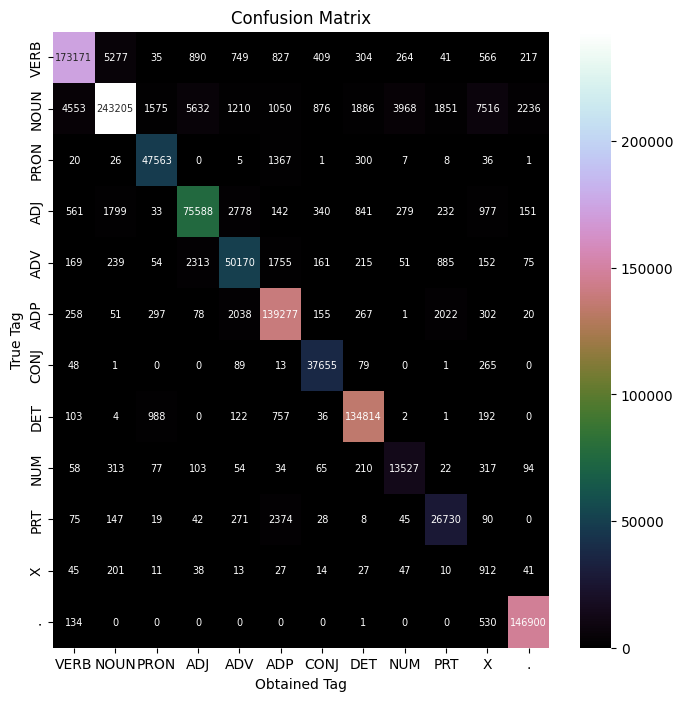

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 7}, fmt='d', cmap='cubehelix', xticklabels=UNIVERSAL_TAGS, yticklabels=UNIVERSAL_TAGS)
plt.xlabel("Obtained Tag")
plt.ylabel("True Tag")
plt.title('Confusion Matrix')
plt.show()